# Linear Regression-House price prediction 
#### The objective is to create a  model that uses linear regression model to predict price of a given dataset(House Sales in King County, USA) from Kaggle.
##### Data  https://www.kaggle.com/datasets/shivachandel/kc-house-data

## Data Description
This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

The dataset contain 21 columns and 21613 rows.

Column defintions 21 features is below:

1.id - Unique ID for each home sold.

2.date - Date of the home sale.

3.price - Price of each home sold.

4.bedrooms - Number of bedrooms.

5.bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower.

6.sqft_living - Square footage of the apartments interior living.

7.sqft_lot - Square footage of the land space.

8.floors - Number of floors.

9.waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not.

10.view - An index from 0 to 4 of how good the view of the property was.

11.condition - An index from 1 to 5 on the condition of the apartment.

12.grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.

13.sqft_above - The square footage of the interior housing space that is above ground level.

14.sqft_basement - The square footage of the interior housing space that is below ground level.

15.yr_built - The year the house was initially built.

16.yr_renovated - The year of the house’s last renovation.

17.zipcode - What zipcode area the house is in.

18.lat - Lattitude.

19.long - Longitude.

20.sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors.

21.sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors.


In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
pd.options.display.max_columns = 30

In [2]:
#read data from csv. file
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


# Preprocessing of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21611 non-null  float64
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [7]:
df['date'] = pd.to_datetime(df['date'])

In [5]:
df.shape

(21613, 21)

In [11]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.396095,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.089843,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [22]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [23]:
df['sqft_above'].fillna(df['sqft_above'].mean(),inplace=True)

In [24]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [25]:
#The 33 bedrooms is the outlier
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [26]:
df=df[df['bedrooms']<30]

# Exploratory Data Analysis

In [27]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.016753,0.002461,0.005144,-0.012276,-0.132118,0.018494,-0.002724,0.011582,-0.023701,0.008111,-0.010862,-0.005128,0.021352,-0.016915,-0.008208,-0.001859,0.020770,-0.002935,-0.138810
price,-0.016753,1.000000,0.315445,0.525147,0.702047,0.089664,0.256811,0.266371,0.397299,0.036336,0.667447,0.605589,0.323812,0.054023,0.126437,-0.053209,0.306998,0.021637,0.585404,0.082451
bedrooms,0.002461,0.315445,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.081930,0.025478,0.366502,0.490609,0.309490,0.159167,0.019617,-0.157093,-0.010541,0.133882,0.402626,0.030402
bathrooms,0.005144,0.525147,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,0.187732,-0.124946,0.664979,0.685323,0.283789,0.506012,0.050735,-0.203858,0.024594,0.223028,0.568628,0.087170
sqft_living,-0.012276,0.702047,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,0.284606,-0.058704,0.762701,0.876587,0.435065,0.318037,0.055358,-0.199421,0.052552,0.240209,0.756419,0.183280
sqft_lot,-0.132118,0.089664,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,0.074707,-0.008935,0.113616,0.183505,0.015293,0.053073,0.007641,-0.129571,-0.085675,0.229516,0.144602,0.718556
floors,0.018494,0.256811,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,0.029432,-0.263706,0.458171,0.523871,-0.245684,0.489302,0.006330,-0.059102,0.049655,0.125388,0.279856,-0.011282
waterfront,-0.002724,0.266371,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.401857,0.016665,0.082773,0.072072,0.080591,-0.026165,0.092884,0.030287,-0.014270,-0.041914,0.086461,0.030702
view,0.011582,0.397299,0.081930,0.187732,0.284606,0.074707,0.029432,0.401857,1.000000,0.046031,0.251315,0.167638,0.276959,-0.053452,0.103915,0.084834,0.006170,-0.078413,0.280432,0.072571
condition,-0.023701,0.036336,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,0.046031,1.000000,-0.144632,-0.158124,0.174057,-0.361380,-0.060602,0.002973,-0.015048,-0.106423,-0.092731,-0.003373


C:\Users\mook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

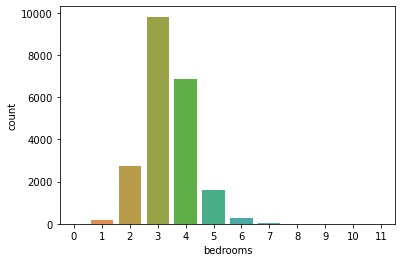

In [28]:
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

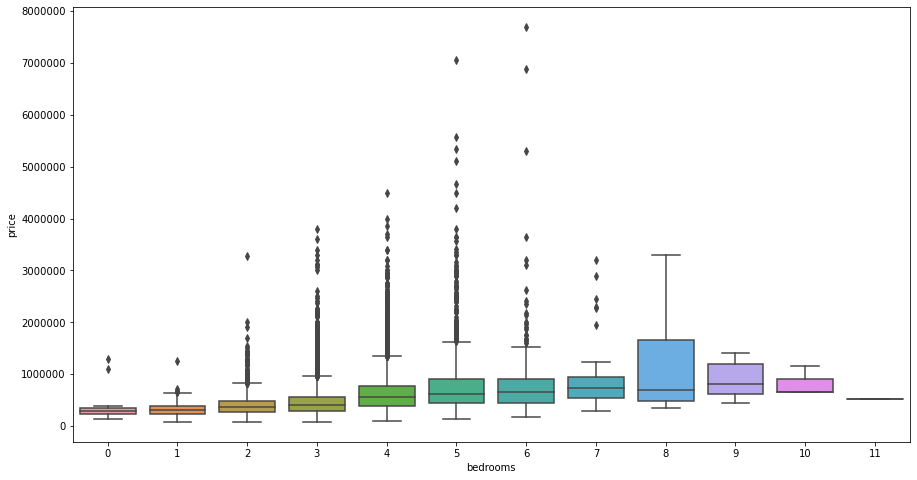

In [29]:
fig, ax = plt.subplots(figsize=(15,8))
ax.ticklabel_format(style='plain')
sns.boxplot(x='bedrooms',y='price',data=df)


<AxesSubplot:>

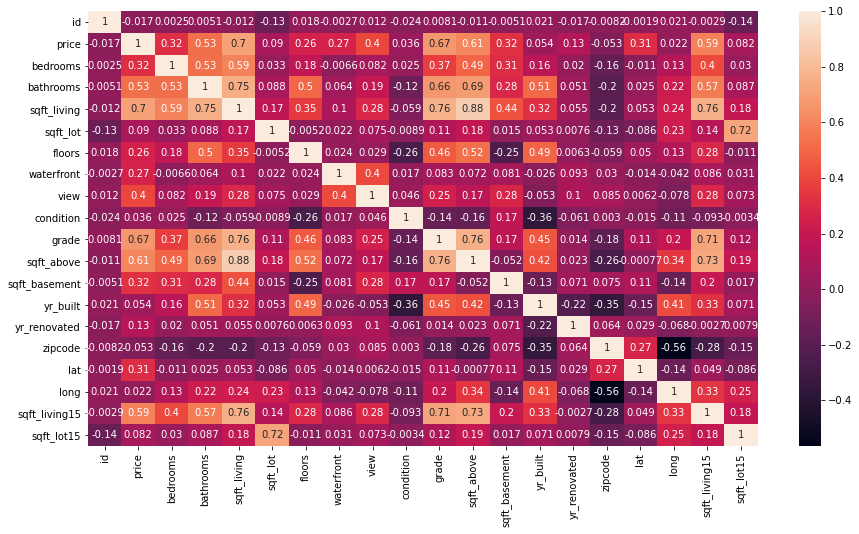

In [30]:
fig, ax = plt.subplots(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,ax=ax)

Text(0, 0.5, 'Square feet')

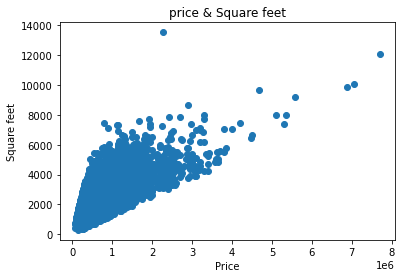

In [31]:
plt.scatter(x=df['price'],y=df['sqft_living'])
plt.title('price & Square feet')
plt.xlabel('Price')
plt.ylabel('Square feet')


Text(0.5, 1.0, 'Price & Bathrooms')

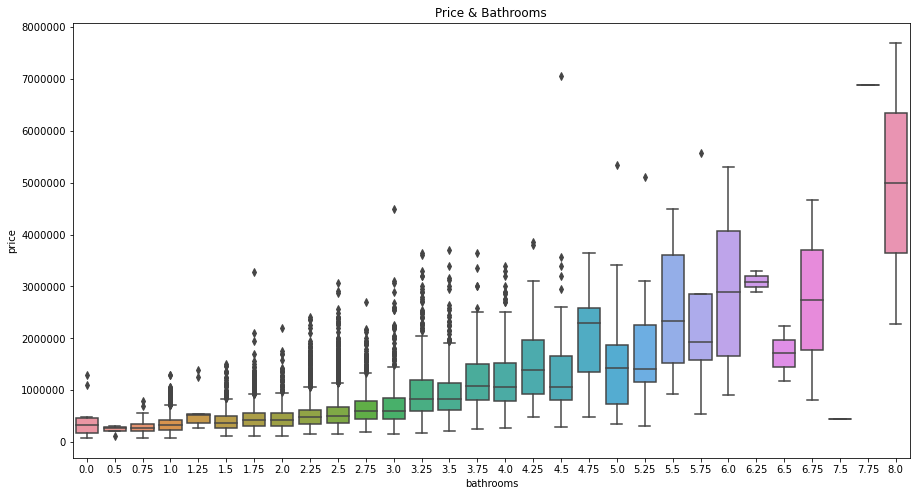

In [32]:
fig, ax = plt.subplots(figsize=(15,8))
ax.ticklabel_format(style='plain')
sns.boxplot(x='bathrooms',y='price',data=df)
plt.title('Price & Bathrooms')

C:\Users\mook\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


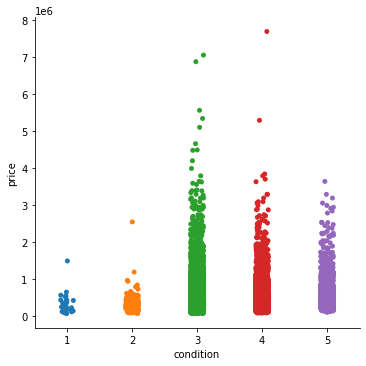

In [33]:
sns.catplot('condition','price',data=df)

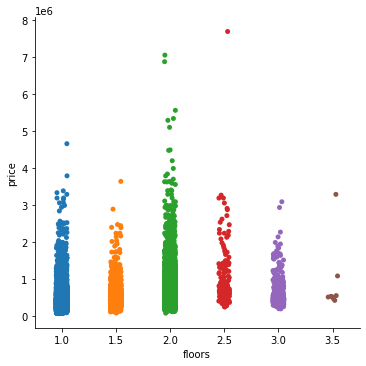

In [34]:
sns.catplot(x='floors',y='price',data=df)

# Experiment

In [35]:
X = df.drop(['id','date','price'],axis=1)
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180.0,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170.0,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770.0,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050.0,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680.0,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
y = df['price']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=2)

In [39]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [40]:
model.score(X_train,y_train)

0.6988001645364239

In [41]:
model.score(X_test,y_test)

0.7128731893763764

In [93]:
y_pred = model.predict(X_test)

In [97]:
mse_ = metrics.mean_absolute_error(y_test,y_pred)
mse_

121707.78797730662

The score of LinearRegression model got 71.28%. I'll use GradientBoostingRegressor to make better score of model.

In [88]:
from sklearn.ensemble import GradientBoostingRegressor
Boot = GradientBoostingRegressor(n_estimators=300,max_depth=5,min_samples_split=2,learning_rate=0.1,loss='ls')
Boot.fit(X_train,y_train)

C:\Users\mook\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:286: FutureWarning: The loss 'ls' was deprecated in v1.0 and will be removed in version 1.2. Use 'squared_error' which is equivalent.
  warnings.warn(


GradientBoostingRegressor(loss='ls', max_depth=5, n_estimators=300)

In [83]:
Boot.score(X_train,y_train)

0.9667757886053338

In [84]:
Boot.score(X_test,y_test)

0.9071626148534597

After using GradientBoostingRegressor model got better scores up to 90.71%.

In [85]:
y_boot = Boot.predict(X_test)

In [86]:
result = pd.DataFrame({'actual': y_test,'predict': y_boot})
result

,actual,predict
12183,710500.0,7.604224e+05
18992,1505000.0,1.460815e+06
8370,425000.0,3.097748e+05
9210,350000.0,3.990329e+05
21107,333490.0,3.502660e+05
...,...,...
1486,229950.0,2.626202e+05
8699,536500.0,4.681544e+05
4225,390000.0,3.725777e+05
21181,725000.0,7.286486e+05


In [87]:
mse = metrics.mean_absolute_error(y_test,y_boot)
mse

61531.28788758045

# Conclusion
After using  Gradient Boosting Regressor model got better scores up to 90.71% on a test set. It still reduces mean absolute error from the first time up to 50.55%